Load necessary packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cmocean

plt.style.use("thesis")

Define initial buoyancy field $b=z+\theta \mod 2\pi$, where
$$ \theta=\frac{s}{3} \cos\left(\frac{x}{4}+3z\right) $$

In [2]:
ny = 1024
nx = 4096
xvec = 2*np.pi*np.arange(nx)/ny
yvec = 2*np.pi*np.arange(ny)/ny

s = 0.75

B = np.zeros((nx,ny))
for j in range(ny):
    B[:,j] = np.mod(yvec[j] + s/3*np.cos(xvec/4 + 3*yvec[j]), 2*np.pi)

Define intial spanwise vorticity field
$$ \zeta_y = \frac{\partial u}{\partial z} - \frac{\partial w}{\partial x} = \cos z + \frac{143 s}{12\sqrt{145}} \cos\left(\frac{x}{4}+3z\right)$$

In [3]:
zeta = np.zeros((nx,ny))
for i in range(nx):
    zeta[i,:] = np.cos(yvec) + 143*s/12/np.sqrt(145)*np.cos(xvec[i]/4 + 3*yvec)

Define figure annotation functions

In [4]:
def anno_tl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, t), xytext=(3, -3), textcoords="offset points", ha='left', va='top')
    return

def anno_tr(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (r, t), xytext=(-3, -3), textcoords="offset points", ha='right', va='top')
    return

## Plot figure 4

875.576037884853


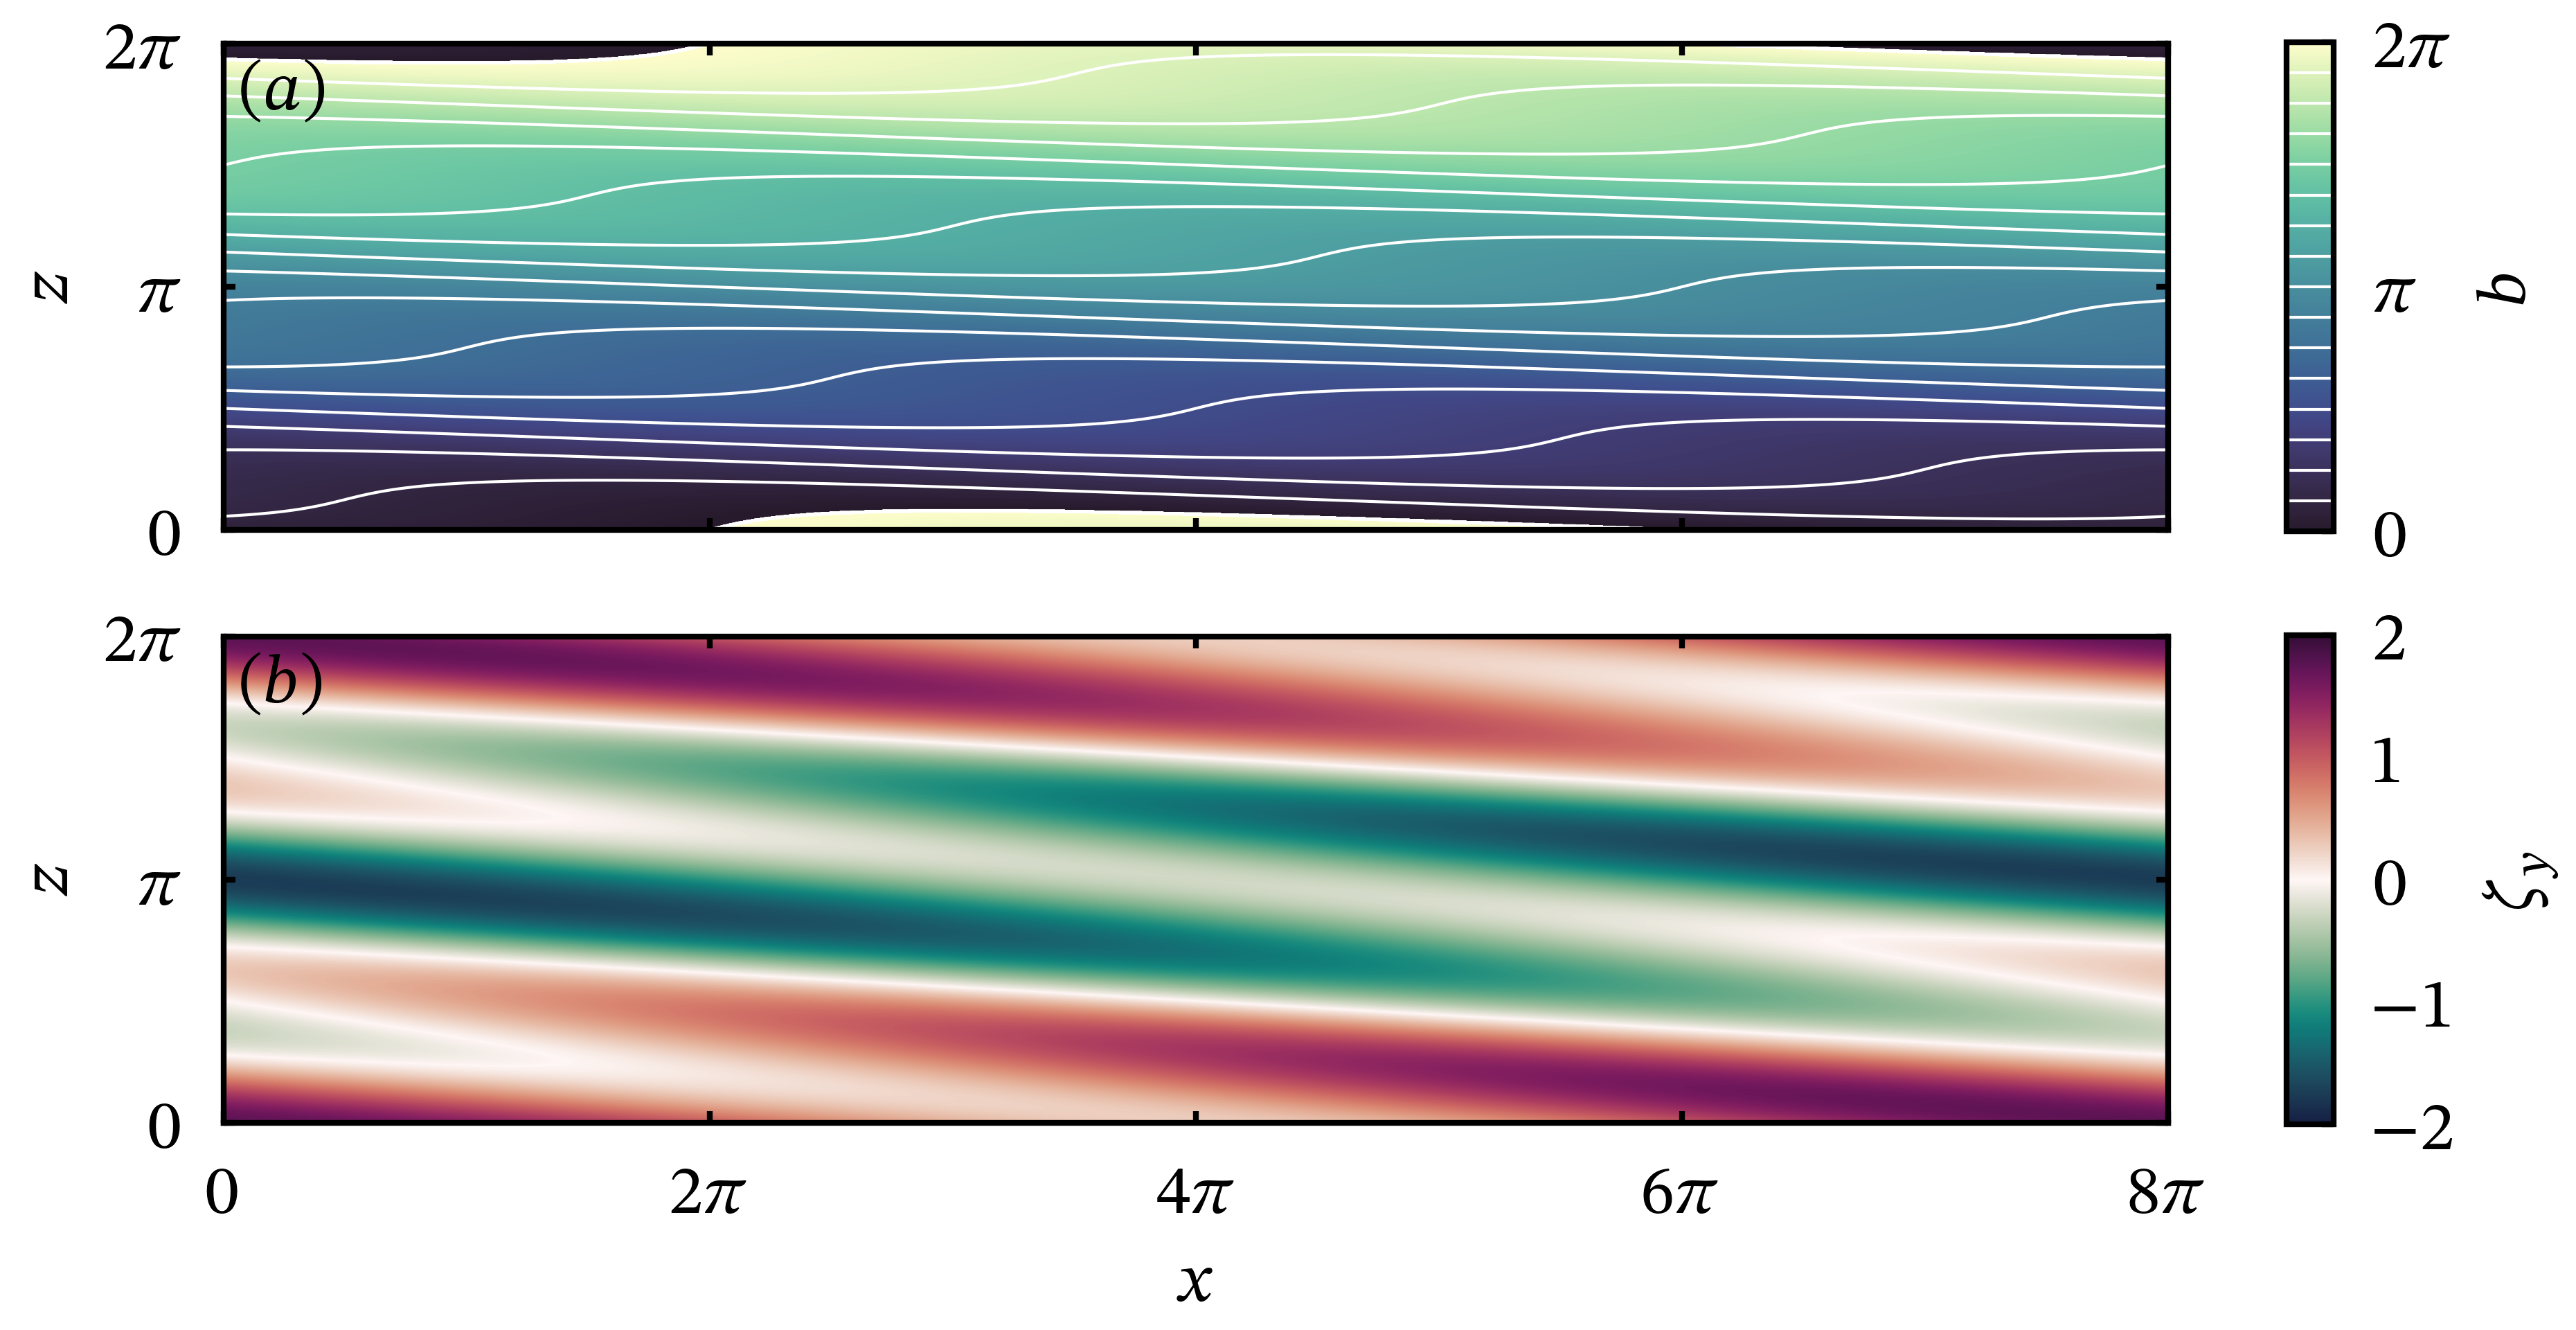

In [5]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(6.2,3.2))

C1 = ax[0].imshow(
    B.T, extent = [0, 8*np.pi, 0, 2*np.pi], origin='lower',
    vmin=0, vmax=2*np.pi, cmap='cmo.deep_r'
)
cont = ax[0].contour(xvec,yvec,B.T, levels=np.arange(17)*np.pi/8, colors='w', linewidths=0.5)
cb1 = fig.colorbar(C1, ax=[ax[0]], label="$b$")
cb1.set_ticks(np.arange(3)*np.pi)
cb1.ax.set_yticklabels(("$0$", "$\\pi$", "$2\\pi$"))
cb1.add_lines(cont)

C2 = ax[1].imshow(
    zeta.T, extent = [0, 8*np.pi, 0, 2*np.pi], origin='lower',
    vmin=-2, vmax=2, cmap='cmo.curl'
)
cb2 = fig.colorbar(C2, ax=[ax[1]], label="$\\zeta_y$")
cb2.set_ticks(np.linspace(-2,2,5))

for axis in ax:
    axis.set(
        aspect='equal',
        xticks=np.arange(5)*2*np.pi,
        yticks=[0,np.pi, 2*np.pi],
        yticklabels=("$0$", "$\\pi$", "$2\\pi$"),
        ylabel="$z$"
    )
ax[1].set(
    xticklabels=("$0$","$2\\pi$","$4\\pi$","$6\\pi$","$8\\pi$"),
    xlabel="$x$"
)
for x in ax:
    x.grid(False)

fig.execute_constrained_layout()

anno_tl(ax[0], "$(a)$")
anno_tl(ax[1], "$(b)$")

bb = ax[0].get_position()
dpi = ny/(bb.y1-bb.y0)/fig.get_figheight()
print(dpi)

# fig.savefig("IC_s075_full_res.pdf", dpi=dpi)
# fig.savefig("EPS/IC_s075_full_res.eps", dpi=dpi)

plt.show()